Importing Libraries

In [270]:
import pandas as pd 
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Loading Train Set

In [271]:
train = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Syntecxhub-Internship-Programme\Flower Classification\datasets\flower classification train set.csv')
train.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,3.1,5.5,1.8,virginica
1,4.6,3.2,1.4,0.2,setosa
2,5.6,2.8,4.9,2.0,virginica
3,5.2,3.5,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Feature Selection 

In [272]:
x = train.drop('species', axis=1)
y = train['species']

Data Splitting 

In [273]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42)

Train Set Model Development 

Decision Tree Classifer

In [274]:
pipe1 = Pipeline([
    ('dt', DecisionTreeClassifier())
])

In [275]:
pipe1.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('dt', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If floa

In [276]:
y_dt_pred = pipe1.predict(x_validate) 

In [277]:
y_dt_pred = accuracy_score(y_validate, y_dt_pred)
y_dt_pred

1.0

Logistic Regression

In [278]:
pipe2 = Pipeline([
    ('lr', LogisticRegression())
])

In [279]:
pipe2.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('lr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpe

In [280]:
y_lr_pred = pipe2.predict(x_validate) 

In [281]:
y_lr_pred = accuracy_score(y_validate, y_lr_pred)
y_lr_pred

1.0

Loading Test Set

In [282]:
test = pd.read_csv(r"C:\Users\pc\Documents\MACHINE LEARNING\Syntecxhub-Internship-Programme\Flower Classification\datasets\flower classification test set.csv")
test.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,3.0,4.9,1.8,virginica
1,5.5,2.3,4.0,1.3,versicolor
2,6.7,3.1,5.6,2.4,virginica
3,5.1,3.8,1.5,0.3,setosa
4,4.9,2.5,4.5,1.7,virginica


In [283]:
x_test = test.drop('species', axis=1)
y_test = test['species']

Logistic Regression

In [284]:
y_pipe2_test = pipe2.predict(x_test) 

In [285]:
ac_test2 = accuracy_score(y_test, y_pipe2_test)
print("Logistic Regression Accuracy Score:", ac_test2)

Logistic Regression Accuracy Score: 0.9333333333333333


In [286]:
test2_cm = confusion_matrix(y_test, y_pipe2_test)
test2_cm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

Misclassifications Interpretation:
- 1 Versicolor was incorrectly predicted as Virginica
- 1 Virginica was incorrectly predicted as Versicolor
- All Setosa (11/11) correctly classified

Performance: 28/30 correct = 93.33% accuracy

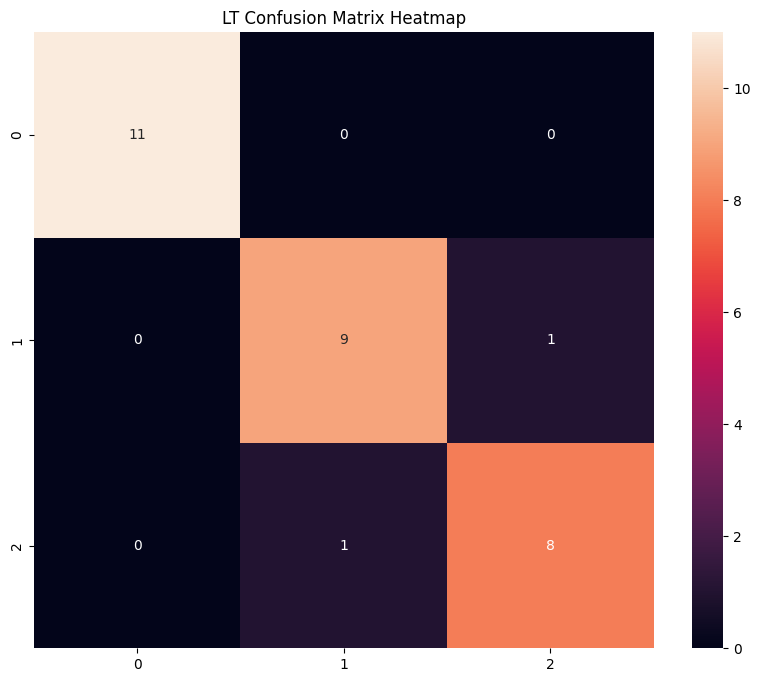

In [287]:
plt.figure(figsize=(10,8))
sns.heatmap(data=test2_cm, annot=True)
plt.title('LT Confusion Matrix Heatmap')
plt.show()

Decision Tree

In [288]:
y_pipe1_test = pipe1.predict(x_test) 

In [289]:
ac_test1 = accuracy_score(y_test, y_pipe1_test)
print("Decision Tree Accuracy Score:", ac_test1)

Decision Tree Accuracy Score: 0.9666666666666667


In [290]:
test1_cm = confusion_matrix(y_test, y_pipe1_test)
test1_cm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

Misclassifications Interpretation:
- 1 Versicolor was incorrectly predicted as Virginica
- All Setosa (11/11) correctly classified
- All Virginica (9/9) correctly classified

Performance: 29/30 correct = 96.67% accuracy

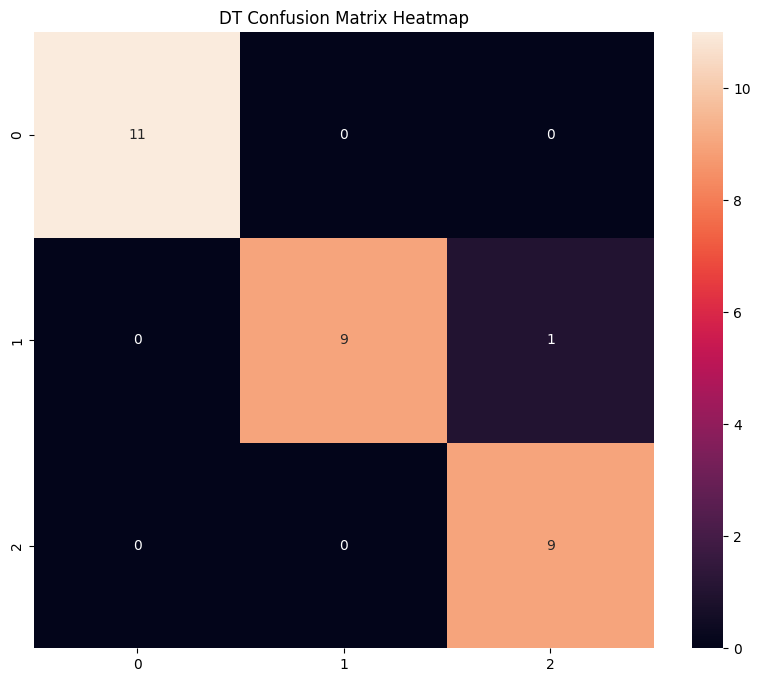

In [291]:
plt.figure(figsize=(10,8))
sns.heatmap(data=test1_cm, annot=True)
plt.title('DT Confusion Matrix Heatmap')
plt.show()

Saving Best Performing Model: Decision Tree

In [296]:
joblib.dump(pipe1, 'decision tree model.pkl')

['decision tree model.pkl']